In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# I. Régression

Le jeu de données pour réaliser notre régression est téléchargeable <a href='https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/entrainez-un-modele-predictif-lineaire/TP_1_prostate_dataset.txt'>ici</a>. C’est un jeu de données assez classiques relativement petit, avec 97 observations et 9 variables. Nous allons ici définir comme variable cible Y la quantité d’expression de l’antigène qui est associée à la détection de ce cancer (la colonne lpsa). Les autres variables sont des constantes associées, dont le détail est disponible <a href='https://rafalab.github.io/pages/649/prostate.html'>ici</a>.

**1) Dans un premier temps, vous chargerez ce jeu de données sous Python.**

In [2]:
sante = pd.read_csv('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/entrainez-un-modele-predictif-lineaire/TP_1_prostate_dataset.txt',
                    sep='\t')
sante.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


**2) Faites une analyse rapide de votre jeu de données : fourchette de valeurs, valeurs manquantes, analyse bivariée, etc…**

In [3]:
sante.isnull().sum() # pas de valeurs manquantes

col        0
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

In [4]:
sante.describe(include='all')

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387,NaN
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329,NaN
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783,NaN
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656,NaN
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516,NaN
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357,NaN


**3) Comme nous l’avons vu plus tôt, lors de la définition d’une régression, nous définissons deux groupes :**
- **X : les variables explicatives**
- **Y : la variable cible**

**Créez les deux dataframes correspondants X et Y, à partir du jeu de données que vous venez de charger.
Nous**

In [5]:
X = sante.drop(columns=['train','lpsa'])
y = sante['lpsa']

**4) Créez 4 nouveaux dataframes à partir de X et Y :**
- X_train : X du jeu d’apprentissage
- Y_train : Y du jeu d’apprentissage
- X_test : X du jeu de test
- Y_test : Y du jeu de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# partage en 70%: train, 30%: test

**5) Entrainez une régression linéaire sur votre jeu d’apprentissage. Vous utiliserez la régression linéaire proposée par scikit-learn pour cela.**

In [7]:
lm = LinearRegression() # création de l'objet régression linéaire, vide
lm.fit(X_train, y_train) # on "fait" apprendre à notre régression linéaire vide via nos jeux de données d'entrainement

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**6) Vous prédirez ensuite les Y' correspondants au jeu de données test (X_test) en utilisant cette régression précédemment entrainée.**

In [8]:
y_pred = lm.predict(X_test) # on réutilise l'objet régression linéaire entrainé plus tôt, pour prédire sur X_test

A partir des Y' que vous venez de prédire, analysez les performances de votre modèle. Pour cela, vous pourrez par exemple calculer :
- L’erreur absolue moyenne (EAM ou MAE pour Mean Absolute Error) : c’est la moyenne arithmétique des valeurs absolues des écarts.
- L’erreur quadratique moyenne (RMSE) : racine carrée du MSE (Mean Square Error ou MCE pour moyenne des carrés des erreurs). C’est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations.

Vous ferez vos recherches pour trouver des fonctions existantes ou recalculer ça « à la main », par vous-même.

In [9]:
MAE = abs(y_pred - y_test).mean()
RMSE = np.sqrt(np.mean((y_pred-y_test)**2))

print('MAE :', MAE)
print('RMSE :', RMSE)

MAE : 0.24796841656403773
RMSE : 0.30729095849864246


**7) Refaites les opérations précédentes (5 et 6) en utilisant cette fois ci une méthode de régression de forêts aléatoires (random forest regressor) avec 10 arbres, puis avec 150 arbres. Quel algorithme semble le plus performant ?**

In [10]:
rf10 = RandomForestRegressor(n_estimators=10) # création du random forest vide, en précisant le nombre d'arbres souhaités
rf10.fit(X_train, y_train) # entrainement
y_pred_rf10 = rf10.predict(X_test) # prédiction
MAE_rf10 = abs(y_pred_rf10 - y_test).mean()

rf150 = RandomForestRegressor(n_estimators=150) # création du random forest vide, en précisant le nombre d'arbres souhaités
rf150.fit(X_train, y_train) # entrainement
y_pred_rf150 = rf150.predict(X_test) # prédiction
MAE_rf150 = abs(y_pred_rf150 - y_test).mean()

print('RF avec 10 arbres :', MAE_rf10, '\nRF avec 150 arbres :', MAE_rf150)

RF avec 10 arbres : 0.08286735499999981 
RF avec 150 arbres : 0.07058151122222246


Le random forest avec les 150 arbres semble nettement plus performant que la régression linéaire et également meilleur que celui avec 10 arbres.

# II. Classification

Le jeu de données utilisé pour notre classification est téléchargeable <a href='https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/entrainez-un-modele-predictif-lineaire/TP_2_datset_mushrooms.csv'>ici</a>. C'est encore un jeu de données assez utilisé comme exemple, qui contient des entrées correspondantes à des caractéristiques de champignons (surface, couleur, etc), ainsi qu'un indicateur 'class' de comestibilité ('p' pour poisonous, 'e' pour edible).

**8) Dans un premier temps, vous chargerez ce jeu de données sous Python.**

In [11]:
champi = pd.read_csv('https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/entrainez-un-modele-predictif-lineaire/TP_2_datset_mushrooms.csv')
champi.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**9) Faites une analyse rapide de votre jeu de données : fourchette de valeurs, valeurs manquantes, analyse bivariée, etc… Vous pourrez égaler recoder la variable cible en 0/1 (0 : empoisonné, 1 : comestible).**

**<font color="red">ERRATUM par rapport au TP : il y a une petite erreur ici, car pour faire tourner nos différents algorithmes, nous allons avoir besoin de recoder TOUTES les variables. Voilà le code correspondant, permettant également de définir ces variables comment étant de type category</font>**

In [12]:
labelencoder=LabelEncoder()
for col in champi.columns:
    champi[col] = labelencoder.fit_transform(champi[col])
    champi[col] = champi[col].astype('category')
champi.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


p = 1, e = 0

**10) Refaites ici également le partage échantillon test / apprentissage.**

In [13]:
X = champi.drop(columns=['class'])
y = champi['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**11) Vous entrainerez ensuite une régression logistique sur notre échantillon d’apprentissage, pour ensuite prédire la variable cible sur l’échantillon test. Vous utiliserez pour cela la régression logistique de scikit learn.**

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

**12) Calculez la matrice de confusion, à partir de la fonction crosstab de pandas.**

In [15]:
pd.crosstab(y_test, y_pred)

col_0,0,1
class,,
0,1190,46
1,78,1124


**13) Evaluez les performances de votre modèle.**

In [16]:
print('via la méthode .score :', lr.score(X_test, y_test))
print('via la fonction accuracy_score :', accuracy_score(y_test, y_pred))

# les résultats sont logiquement équivalents...

via la méthode .score : 0.9491386382280558
via la fonction accuracy_score : 0.9491386382280558


**14) Vous utiliserez ensuite un algorithme de classification de random forest (random forest classifier) et reprendrez les étapes précédentes pour estimer ces performances.**

In [17]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(rf.score(X_test, y_test))

pd.crosstab(y_test, y_pred_rf)

1.0


col_0,0,1
class,,
0,1236,0
1,0,1202


Le modèle semble être cette fois ci parfait !

**15) Vous utiliserez ensuite un algorithme de machine à vecteurs support (ou SVM pour support
vector machine) pour comparer avec les deux modèles précédents. Nous utiliserons pour cela
la fonction SVC de scikit learn.**

In [18]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(svm.score(X_test, y_test))

pd.crosstab(y_test, y_pred_svm)

1.0


col_0,0,1
class,,
0,1236,0
1,0,1202


Modèle parfait également !

**16) Quel est finalement le modèle le plus performant ?**

SVM ou randomForest. On ne conservera pour la suite que le randomForest, les deux étants similaires
<br><br>

**17) Calculez l’AUC de chaque modèle et tracez les trois courbes ROC sur un même graphique. Vous pourrez vous aider du code suivant, donné avec un X_test et Y_test correspondant à X et Y de l’échantillon d’apprentissage et model le modèle (reg log, random forest, etc…).**

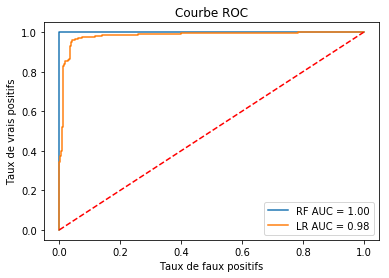

In [19]:
modeles = ['RF', 'LR']

plt.title('Courbe ROC')

for i, model in enumerate([rf, lr]):
    probs = model.predict_proba(X_test) 
    preds = probs[:,1] 
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    tpr = np.insert(tpr, 0, 0)
    fpr = np.insert(fpr, 0, 0)

    plt.plot(fpr, tpr, label = modeles[i]+' AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('Taux de vrais positifs')
plt.xlabel('Taux de faux positifs')
plt.show()